# Life Expectancy Data GHO

All of the data in this dataset is compiled and downloaded from the Global Health Observatory (GHO).

Life Expectancy from birth was collected from: https://www.who.int/data/gho/data/indicators/indicator-details/GHO/life-expectancy-at-birth-(years)

The rest of the factors was collected from: https://www.who.int/data/gho/data/themes/mortality-and-global-health-estimates/ghe-leading-causes-of-death (BY COUNTRY, Summary tables of mortality estimates by cause, age and sex, by country, 2000–2019, Number of Deaths [2000, 2010, 2015, 2019]).

All of the values are crude estimates number of deaths per 1000.

In [1]:
import pandas as pd
import numpy as np

In [2]:
data= pd.read_csv("Life Expectancy Data.csv", low_memory=False)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1464 entries, 0 to 1463
Columns: 147 entries, Country to Collective violence and legal intervention
dtypes: float64(138), int64(7), object(2)
memory usage: 1.6+ MB


In [3]:
data.head()

,Country,Year,Gender,Life Expectancy at birth,BMI,Alcohol,Tuberculosis,Syphilis,Chlamydia,Gonorrhoea,...,Poisonings,Falls,"Fire, heat and hot substances",Drowning,Exposure to mechanical forces,Natural disasters,Other unintentional injuries,Self-harm,Interpersonal violence,Collective violence and legal intervention
0,Afghanistan,2019,Male,63.29,NaN,0.003,4.454469,0.050986,0.000000,0.000321,...,0.057880,0.620751,0.151339,0.801665,1.545577,0.067079,2.008284,0.904954,2.595521,12.843526
1,Afghanistan,2019,Female,63.16,NaN,0.022,5.384610,0.043190,0.001424,0.004201,...,0.325711,0.284562,0.196666,0.194389,0.056229,0.067360,1.233210,0.667653,0.621160,12.776039
2,Afghanistan,2015,Male,61.04,22.5,0.002,6.109258,0.056666,0.000000,0.000277,...,3.980983,0.056828,0.570412,0.151665,0.769096,1.382456,0.286633,0.768236,2.553344,16.771404
3,Afghanistan,2015,Female,62.35,24.0,0.014,7.384937,0.047379,0.001201,0.003568,...,0.310311,0.322669,0.183147,0.251741,0.052141,0.172981,1.203843,0.597401,0.576237,7.570893
4,Afghanistan,2010,Male,59.60,22.1,0.006,5.652315,0.051922,0.000000,0.000243,...,0.087785,0.697883,0.235376,1.370172,1.611014,0.219533,2.513913,0.692336,2.233730,5.684718


# Transforming the data

To make the study easier we'll first the data by Spain, Ireland, Ethiopia, Thailand, Haiti.

In [4]:
data_filt=data[data["Country"].isin(["Spain","Ireland","Ethiopia","Thailand","Haiti"])]
data_filt

,Country,Year,Gender,Life Expectancy at birth,BMI,Alcohol,Tuberculosis,Syphilis,Chlamydia,Gonorrhoea,...,Poisonings,Falls,"Fire, heat and hot substances",Drowning,Exposure to mechanical forces,Natural disasters,Other unintentional injuries,Self-harm,Interpersonal violence,Collective violence and legal intervention
448,Ethiopia,2019,Male,66.90,NaN,0.78,11.783481,1.035269e+00,0.000000,0.011826,...,2.600333,2.594111,1.872977,1.980848,2.071121,0.000000,6.972934,4.321578,5.992665,0.201939
449,Ethiopia,2019,Female,70.52,NaN,3.66,9.671605,6.639447e-01,0.020908,0.055490,...,1.068004,1.916032,1.381754,1.152029,1.478834,0.000000,4.761700,1.708675,2.083331,0.078603
450,Ethiopia,2015,Male,65.04,20.0,0.57,14.569169,8.789865e-01,0.000000,0.013272,...,18.608556,2.519425,2.303509,1.778995,1.890527,2.006880,0.000000,3.965982,5.912295,0.455274
451,Ethiopia,2015,Female,68.64,21.0,2.66,11.958033,5.750565e-01,0.020635,0.054494,...,0.997496,1.650562,1.175642,1.130744,1.334225,0.000000,4.519378,1.596663,2.008353,0.172044
452,Ethiopia,2010,Male,61.33,20.0,0.52,17.173923,1.020953e+00,0.000000,0.016796,...,2.951606,2.243072,2.098688,2.478458,2.175086,0.011952,7.953199,4.250821,5.640412,0.418235
453,Ethiopia,2010,Female,64.55,20.7,2.45,14.095954,6.946447e-01,0.024046,0.063404,...,1.250340,1.460586,1.294439,1.615997,1.506617,0.007693,5.475874,1.930218,1.900440,0.198101
454,Ethiopia,2000,Male,49.52,19.7,0.25,30.904238,1.501322e+00,0.000000,0.024662,...,2.992435,2.073918,1.666293,2.506902,1.710099,0.043559,7.095632,4.383416,5.484879,31.741050
455,Ethiopia,2000,Female,51.70,20.0,1.19,25.365476,1.044046e+00,0.031730,0.084367,...,1.097757,1.192662,1.080640,1.556480,1.030925,0.028335,4.793813,2.024071,1.828124,15.882021
568,Haiti,2019,Male,63.34,NaN,1.19,0.555617,1.484715e-01,0.000000,0.001282,...,0.107073,0.362921,0.247078,0.916136,0.645626,0.000000,0.889478,0.654834,1.855126,0.004043
569,Haiti,2019,Female,64.76,NaN,4.96,0.451757,1.028387e-01,0.004540,0.012770,...,0.047296,0.185984,0.222882,0.390150,0.165648,0.000000,0.609083,0.430509,0.474483,0.001429


For the same reason we will filter the data by some diseases we find interesting to study.

In [5]:
data_filt2=data_filt.filter(items=["Country","Year","Gender","Life Expectancy at birth","BMI","Alcohol","Liver cancer","Trachea, bronchus, lung cancers","Malignant skin melanoma"])
data_filt2

,Country,Year,Gender,Life Expectancy at birth,BMI,Alcohol,Liver cancer,"Trachea, bronchus, lung cancers",Malignant skin melanoma
448,Ethiopia,2019,Male,66.90,NaN,0.78,0.794959,1.099685,0.092366
449,Ethiopia,2019,Female,70.52,NaN,3.66,0.934975,1.102366,0.023251
450,Ethiopia,2015,Male,65.04,20.0,0.57,0.703144,0.936785,0.082474
451,Ethiopia,2015,Female,68.64,21.0,2.66,0.828693,0.871726,0.018083
452,Ethiopia,2010,Male,61.33,20.0,0.52,0.581890,0.821278,0.068743
453,Ethiopia,2010,Female,64.55,20.7,2.45,0.735933,0.674625,0.016068
454,Ethiopia,2000,Male,49.52,19.7,0.25,0.480815,0.729630,0.054721
455,Ethiopia,2000,Female,51.70,20.0,1.19,0.738690,0.473262,0.016767
568,Haiti,2019,Male,63.34,NaN,1.19,0.350066,0.206783,0.009134
569,Haiti,2019,Female,64.76,NaN,4.96,0.312400,0.284726,0.007016


# Cleaning the data

In [6]:
data_filt2 = data_filt2.rename(columns={'Country':'country',
                                        'Alcohol':'alcohol',
                                        'Year':'year',
                                        'Gender':'gender',
                                        'Life Expectancy at birth': 'life_expectancy_at_birth',
                                        'Liver cancer':'liver_cancer',
                                        'Trachea, bronchus, lung cancers':'trachea,_bronchus,_lung_cancers',
                                        'Malignant skin melanoma':'malignant_skin_melanoma'})

In [7]:
by_country=data_filt2[data_filt2["country"].isin(["Ethiopia","Haiti"])]
by_country

,country,year,gender,life_expectancy_at_birth,BMI,alcohol,liver_cancer,"trachea,_bronchus,_lung_cancers",malignant_skin_melanoma
448,Ethiopia,2019,Male,66.90,NaN,0.78,0.794959,1.099685,0.092366
449,Ethiopia,2019,Female,70.52,NaN,3.66,0.934975,1.102366,0.023251
450,Ethiopia,2015,Male,65.04,20.0,0.57,0.703144,0.936785,0.082474
451,Ethiopia,2015,Female,68.64,21.0,2.66,0.828693,0.871726,0.018083
452,Ethiopia,2010,Male,61.33,20.0,0.52,0.581890,0.821278,0.068743
453,Ethiopia,2010,Female,64.55,20.7,2.45,0.735933,0.674625,0.016068
454,Ethiopia,2000,Male,49.52,19.7,0.25,0.480815,0.729630,0.054721
455,Ethiopia,2000,Female,51.70,20.0,1.19,0.738690,0.473262,0.016767
568,Haiti,2019,Male,63.34,NaN,1.19,0.350066,0.206783,0.009134
569,Haiti,2019,Female,64.76,NaN,4.96,0.312400,0.284726,0.007016


# Transforming the data

In [8]:
liver_cancer=data_filt2.pivot_table("liver_cancer", index="country", columns="gender", aggfunc="mean")
liver_cancer

gender,Female,Male
country,,
Ethiopia,0.809573,0.640202
Haiti,0.271753,0.295935
Ireland,0.100522,0.160380
Spain,1.621281,3.299740
Thailand,5.784534,13.465386


# Visualizing the data

The country with the most cases of death by liver cancer is Thailand followed by Spain.

<AxesSubplot:ylabel='country'>

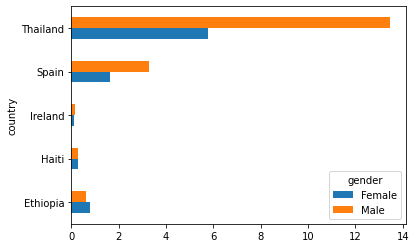

In [9]:
liver_cancer.plot(kind="barh")

# Transforming the data

In [10]:
lung_cancer=data_filt2.pivot_table("trachea,_bronchus,_lung_cancers", index="country", columns="gender", aggfunc="mean")
lung_cancer

gender,Female,Male
country,,
Ethiopia,0.780495,0.896844
Haiti,0.222075,0.170057
Ireland,0.724089,1.002211
Spain,3.695929,17.295081
Thailand,6.665281,12.641568


# Visualizing the data

The country with the most cases of death by trachea, bronchus and lung cancer is Spain followed by Thailand.

<AxesSubplot:ylabel='country'>

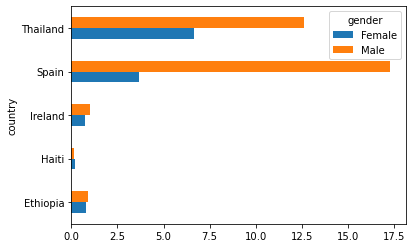

In [11]:
lung_cancer.plot(kind="barh")

# Transforming the data

In [12]:
skin_cancer=data_filt2.pivot_table("malignant_skin_melanoma", index="country", columns="gender", aggfunc="mean")
skin_cancer

gender,Female,Male
country,,
Ethiopia,0.018542,0.074576
Haiti,0.006570,0.007994
Ireland,0.060750,0.082939
Spain,0.469569,0.576715
Thailand,0.133284,0.138634


# Visualizing the data

The country with the most cases of death by skin cancer is Spain followed by Thailand.

<AxesSubplot:ylabel='country'>

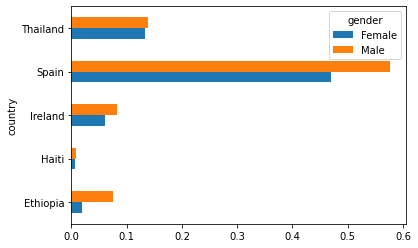

In [13]:
skin_cancer.plot(kind="barh")

# Transforming the data

In [14]:
alcohol=data_filt2.pivot_table("alcohol", index="country", columns="gender", aggfunc="mean")
alcohol

gender,Female,Male
country,,
Ethiopia,2.4900,0.5300
Haiti,5.2475,1.2700
Ireland,6.6400,20.1650
Spain,5.3775,18.2600
Thailand,3.4075,13.0675


# Visualizing the data

The country with the most cases of death by alcoholism is Ireland followed by Spain.

<AxesSubplot:ylabel='country'>

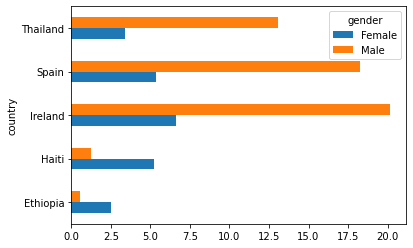

In [15]:
alcohol.plot(kind="barh")

# Cleaning the data

In [16]:
data_filt2['BMI'] = data_filt2['BMI'].fillna(data_filt2['BMI'].mean())

In [17]:
data_filt2

,country,year,gender,life_expectancy_at_birth,BMI,alcohol,liver_cancer,"trachea,_bronchus,_lung_cancers",malignant_skin_melanoma
448,Ethiopia,2019,Male,66.90,24.256667,0.78,0.794959,1.099685,0.092366
449,Ethiopia,2019,Female,70.52,24.256667,3.66,0.934975,1.102366,0.023251
450,Ethiopia,2015,Male,65.04,20.000000,0.57,0.703144,0.936785,0.082474
451,Ethiopia,2015,Female,68.64,21.000000,2.66,0.828693,0.871726,0.018083
452,Ethiopia,2010,Male,61.33,20.000000,0.52,0.581890,0.821278,0.068743
453,Ethiopia,2010,Female,64.55,20.700000,2.45,0.735933,0.674625,0.016068
454,Ethiopia,2000,Male,49.52,19.700000,0.25,0.480815,0.729630,0.054721
455,Ethiopia,2000,Female,51.70,20.000000,1.19,0.738690,0.473262,0.016767
568,Haiti,2019,Male,63.34,24.256667,1.19,0.350066,0.206783,0.009134
569,Haiti,2019,Female,64.76,24.256667,4.96,0.312400,0.284726,0.007016


## Transforming the data

In [18]:
BMI=data_filt2.pivot_table("BMI", index="country", columns="gender", aggfunc="mean")
BMI

gender,Female,Male
country,,
Ethiopia,21.489167,20.989167
Haiti,23.564167,25.139167
Ireland,25.939167,26.589167
Spain,25.014167,26.189167
Thailand,24.264167,23.389167


## Visualizing the data

The country with higher BMI is Ireland followed by Spain and surprisingly Haiti.

<AxesSubplot:ylabel='country'>

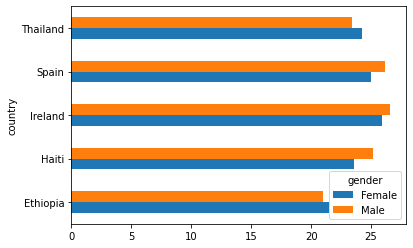

In [19]:
BMI.plot(kind="barh")

## Transforming the data

In [20]:
life_expectancy=data_filt2.pivot_table("life_expectancy_at_birth", index="country", columns="gender", aggfunc="mean")
life_expectancy

gender,Female,Male
country,,
Ethiopia,63.8525,60.6975
Haiti,55.1100,52.5925
Ireland,81.9675,77.9250
Spain,84.4200,78.6975
Thailand,79.0600,72.3125


## Visualizing the data

The country with higher life expectancy is Spain followed by Ireland.

<AxesSubplot:ylabel='country'>

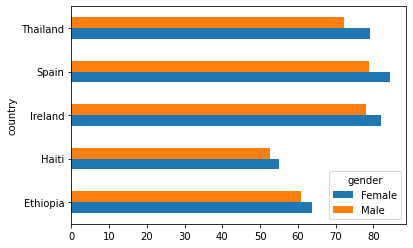

In [21]:
life_expectancy.plot(kind="barh")

# Ireland data study

## Transforming the data

In [22]:
data_Ireland=data_filt2[data_filt2["country"].isin(["Ireland"])]
data_Ireland

,country,year,gender,life_expectancy_at_birth,BMI,alcohol,liver_cancer,"trachea,_bronchus,_lung_cancers",malignant_skin_melanoma
632,Ireland,2019,Male,80.20,24.256667,19.38,0.195210,1.102030,0.093018
633,Ireland,2019,Female,83.48,24.256667,6.34,0.122761,0.813868,0.076399
634,Ireland,2015,Male,79.33,27.800000,19.24,0.188269,1.017590,0.080440
635,Ireland,2015,Female,82.93,27.000000,6.22,0.100018,0.762705,0.057849
636,Ireland,2010,Male,78.33,27.600000,18.65,0.147369,0.961969,0.084740
637,Ireland,2010,Female,82.44,26.700000,6.06,0.097376,0.695880,0.059014
638,Ireland,2000,Male,73.84,26.700000,23.39,0.110671,0.927255,0.073559
639,Ireland,2000,Female,79.02,25.800000,7.94,0.081931,0.623906,0.049736


In [23]:
Ireland_data=data_Ireland.pivot_table(values=['alcohol',
                                            'liver_cancer','trachea,_bronchus,_lung_cancers',
                                            'malignant_skin_melanoma'], index="country", columns="gender", aggfunc="mean")
Ireland_data

alcohol         liver_cancer          malignant_skin_melanoma  \
gender   Female    Male       Female     Male                  Female   
country                                                                 
Ireland    6.64  20.165     0.100522  0.16038                 0.06075   

                  trachea,_bronchus,_lung_cancers            
gender       Male                          Female      Male  
country                                                      
Ireland  0.082939                        0.724089  1.002211

In [24]:
Ireland_data= Ireland_data.unstack(-1)
Ireland_diseases = Ireland_data.reset_index()
Ireland_diseases.head(10)

,level_0,gender,country,0
0,alcohol,Female,Ireland,6.640000
1,alcohol,Male,Ireland,20.165000
2,liver_cancer,Female,Ireland,0.100522
3,liver_cancer,Male,Ireland,0.160380
4,malignant_skin_melanoma,Female,Ireland,0.060750
5,malignant_skin_melanoma,Male,Ireland,0.082939
6,"trachea,_bronchus,_lung_cancers",Female,Ireland,0.724089
7,"trachea,_bronchus,_lung_cancers",Male,Ireland,1.002211


## Cleaning the data

In [25]:
Ireland_diseases = Ireland_diseases.rename(columns={'level_0':'diseases',0:'value'})
Ireland_diseases.head(10)

,diseases,gender,country,value
0,alcohol,Female,Ireland,6.640000
1,alcohol,Male,Ireland,20.165000
2,liver_cancer,Female,Ireland,0.100522
3,liver_cancer,Male,Ireland,0.160380
4,malignant_skin_melanoma,Female,Ireland,0.060750
5,malignant_skin_melanoma,Male,Ireland,0.082939
6,"trachea,_bronchus,_lung_cancers",Female,Ireland,0.724089
7,"trachea,_bronchus,_lung_cancers",Male,Ireland,1.002211


## Transforming the data

In [26]:
def norm_total(group):
    group["normed_value"] = group["value"]/group["value"].sum()
    return group
Ireland_diseases= Ireland_diseases.groupby("diseases").apply(norm_total)
Ireland_diseases

,diseases,gender,country,value,normed_value
0,alcohol,Female,Ireland,6.640000,0.247715
1,alcohol,Male,Ireland,20.165000,0.752285
2,liver_cancer,Female,Ireland,0.100522,0.385286
3,liver_cancer,Male,Ireland,0.160380,0.614714
4,malignant_skin_melanoma,Female,Ireland,0.060750,0.422786
5,malignant_skin_melanoma,Male,Ireland,0.082939,0.577214
6,"trachea,_bronchus,_lung_cancers",Female,Ireland,0.724089,0.419446
7,"trachea,_bronchus,_lung_cancers",Male,Ireland,1.002211,0.580554


## Visualizing the data

It seems to be alcoholism the main reasen of death followed by liver cancer.

[Text(0.5, 1.0, 'Ireland Diseases')]

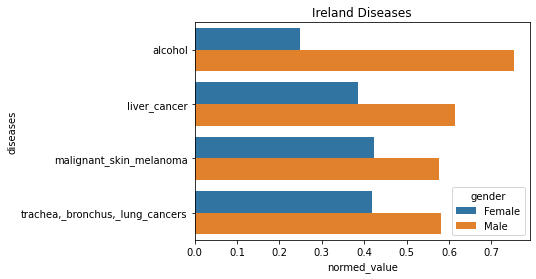

In [27]:
import seaborn as sns
Ireland_diseases_plot=sns.barplot(x='normed_value',y="diseases",hue="gender", data= Ireland_diseases).set(title='Ireland Diseases')
Ireland_diseases_plot

# Spain data study

## Transforming the data

In [28]:
data_Spain=data_filt2[data_filt2["country"].isin(["Spain"])]
data_Spain

,country,year,gender,life_expectancy_at_birth,BMI,alcohol,liver_cancer,"trachea,_bronchus,_lung_cancers",malignant_skin_melanoma
1224,Spain,2019,Male,80.68,24.256667,19.94,3.476481,17.378053,0.589791
1225,Spain,2019,Female,85.68,24.256667,5.76,1.621939,4.752453,0.490028
1226,Spain,2015,Male,79.66,27.000000,17.90,3.555446,17.724093,0.638811
1227,Spain,2015,Female,84.94,24.900000,5.16,1.642767,4.485809,0.557979
1228,Spain,2010,Male,78.76,27.000000,15.86,3.310911,18.190513,0.629452
1229,Spain,2010,Female,84.58,25.300000,4.67,1.706292,3.599722,0.480318
1230,Spain,2000,Male,75.69,26.500000,19.34,2.856123,15.887666,0.448804
1231,Spain,2000,Female,82.48,25.600000,5.92,1.514124,1.945731,0.349950


In [29]:
Spain_data=data_Spain.pivot_table(values=['alcohol',
                                            'liver_cancer','trachea,_bronchus,_lung_cancers',
                                            'malignant_skin_melanoma'], index="country", columns="gender", aggfunc="mean")
Spain_data

alcohol        liver_cancer          malignant_skin_melanoma  \
gender   Female   Male       Female     Male                  Female   
country                                                                
Spain    5.3775  18.26     1.621281  3.29974                0.469569   

                  trachea,_bronchus,_lung_cancers             
gender       Male                          Female       Male  
country                                                       
Spain    0.576715                        3.695929  17.295081

In [30]:
Spain_data= Spain_data.unstack(-1)
Spain_diseases = Spain_data.reset_index()
Spain_diseases.head(10)

,level_0,gender,country,0
0,alcohol,Female,Spain,5.377500
1,alcohol,Male,Spain,18.260000
2,liver_cancer,Female,Spain,1.621281
3,liver_cancer,Male,Spain,3.299740
4,malignant_skin_melanoma,Female,Spain,0.469569
5,malignant_skin_melanoma,Male,Spain,0.576715
6,"trachea,_bronchus,_lung_cancers",Female,Spain,3.695929
7,"trachea,_bronchus,_lung_cancers",Male,Spain,17.295081


### Cleaning the data

In [31]:
Spain_diseases = Spain_diseases.rename(columns={'level_0':'diseases',0:'value'})
Spain_diseases.head(10)

,diseases,gender,country,value
0,alcohol,Female,Spain,5.377500
1,alcohol,Male,Spain,18.260000
2,liver_cancer,Female,Spain,1.621281
3,liver_cancer,Male,Spain,3.299740
4,malignant_skin_melanoma,Female,Spain,0.469569
5,malignant_skin_melanoma,Male,Spain,0.576715
6,"trachea,_bronchus,_lung_cancers",Female,Spain,3.695929
7,"trachea,_bronchus,_lung_cancers",Male,Spain,17.295081


## Transforming the data

In [32]:
Spain_diseases= Spain_diseases.groupby("diseases").apply(norm_total)
Spain_diseases

,diseases,gender,country,value,normed_value
0,alcohol,Female,Spain,5.377500,0.227499
1,alcohol,Male,Spain,18.260000,0.772501
2,liver_cancer,Female,Spain,1.621281,0.329460
3,liver_cancer,Male,Spain,3.299740,0.670540
4,malignant_skin_melanoma,Female,Spain,0.469569,0.448797
5,malignant_skin_melanoma,Male,Spain,0.576715,0.551203
6,"trachea,_bronchus,_lung_cancers",Female,Spain,3.695929,0.176072
7,"trachea,_bronchus,_lung_cancers",Male,Spain,17.295081,0.823928


## Visualizing the data

[Text(0.5, 1.0, 'Spain Diseases')]

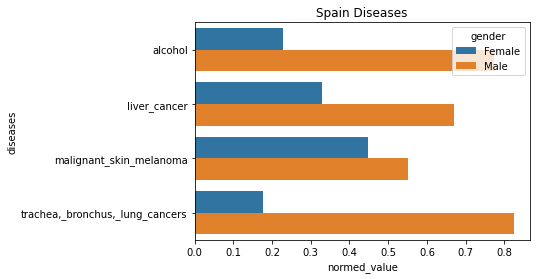

In [33]:
import seaborn as sns
Spain_diseases_plot=sns.barplot(x='normed_value',y="diseases",hue="gender", data= Spain_diseases).set(title='Spain Diseases')
Spain_diseases_plot

# Thailand data study

## Transforming the data

In [34]:
data_Thailand=data_filt2[data_filt2["country"].isin(["Thailand"])]
data_Thailand

,country,year,gender,life_expectancy_at_birth,BMI,alcohol,liver_cancer,"trachea,_bronchus,_lung_cancers",malignant_skin_melanoma
1288,Thailand,2019,Male,74.36,24.256667,13.75,16.772807,14.508783,0.153938
1289,Thailand,2019,Female,81.04,24.256667,3.61,7.109912,7.787535,0.141747
1290,Thailand,2015,Male,74.13,23.800000,14.16,14.937621,12.808901,0.143218
1291,Thailand,2015,Female,80.70,24.900000,3.71,6.410925,6.621868,0.132329
1292,Thailand,2010,Male,73.24,23.200000,11.45,13.337760,12.191042,0.133727
1293,Thailand,2010,Female,79.30,24.400000,2.98,5.854904,6.323567,0.130790
1294,Thailand,2000,Male,67.52,22.300000,12.91,8.813357,11.057548,0.123652
1295,Thailand,2000,Female,75.20,23.500000,3.33,3.762396,5.928154,0.128270


In [35]:
Thailand_data=data_Thailand.pivot_table(values=['alcohol',
                                            'liver_cancer','trachea,_bronchus,_lung_cancers',
                                            'malignant_skin_melanoma'], index="country", columns="gender", aggfunc="mean")
Thailand_data

alcohol          liver_cancer            malignant_skin_melanoma  \
gender    Female     Male       Female       Male                  Female   
country                                                                     
Thailand  3.4075  13.0675     5.784534  13.465386                0.133284   

                   trachea,_bronchus,_lung_cancers             
gender        Male                          Female       Male  
country                                                        
Thailand  0.138634                        6.665281  12.641568

In [36]:
Thailand_data= Thailand_data.unstack(-1)
Thailand_diseases = Thailand_data.reset_index()
Thailand_diseases.head(10)

,level_0,gender,country,0
0,alcohol,Female,Thailand,3.407500
1,alcohol,Male,Thailand,13.067500
2,liver_cancer,Female,Thailand,5.784534
3,liver_cancer,Male,Thailand,13.465386
4,malignant_skin_melanoma,Female,Thailand,0.133284
5,malignant_skin_melanoma,Male,Thailand,0.138634
6,"trachea,_bronchus,_lung_cancers",Female,Thailand,6.665281
7,"trachea,_bronchus,_lung_cancers",Male,Thailand,12.641568


## Cleaning the data

In [37]:
Thailand_diseases = Thailand_diseases.rename(columns={'level_0':'diseases',0:'value'})
Thailand_diseases.head(10)

,diseases,gender,country,value
0,alcohol,Female,Thailand,3.407500
1,alcohol,Male,Thailand,13.067500
2,liver_cancer,Female,Thailand,5.784534
3,liver_cancer,Male,Thailand,13.465386
4,malignant_skin_melanoma,Female,Thailand,0.133284
5,malignant_skin_melanoma,Male,Thailand,0.138634
6,"trachea,_bronchus,_lung_cancers",Female,Thailand,6.665281
7,"trachea,_bronchus,_lung_cancers",Male,Thailand,12.641568


## Transforming the data

In [38]:
Thailand_diseases= Thailand_diseases.groupby("diseases").apply(norm_total)
Thailand_diseases

,diseases,gender,country,value,normed_value
0,alcohol,Female,Thailand,3.407500,0.206829
1,alcohol,Male,Thailand,13.067500,0.793171
2,liver_cancer,Female,Thailand,5.784534,0.300497
3,liver_cancer,Male,Thailand,13.465386,0.699503
4,malignant_skin_melanoma,Female,Thailand,0.133284,0.490163
5,malignant_skin_melanoma,Male,Thailand,0.138634,0.509837
6,"trachea,_bronchus,_lung_cancers",Female,Thailand,6.665281,0.345229
7,"trachea,_bronchus,_lung_cancers",Male,Thailand,12.641568,0.654771


## Visualizing the data

[Text(0.5, 1.0, 'Thailand Diseases')]

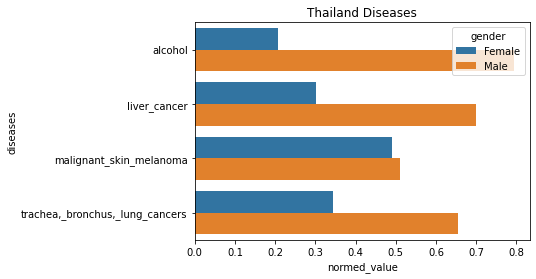

In [39]:
import seaborn as sns
Thailand_diseases_plot=sns.barplot(x='normed_value',y="diseases",hue="gender", data= Thailand_diseases).set(title='Thailand Diseases')
Thailand_diseases_plot

# Comparing data studies

In [40]:
Ireland_data=data_Ireland.pivot_table(values=['alcohol','life_expectancy_at_birth',
                                            'liver_cancer','trachea,_bronchus,_lung_cancers',
                                            'malignant_skin_melanoma'], index="country", columns="gender", aggfunc="mean")
Ireland_data= Ireland_data.unstack(-1)
Ireland_diseases = Ireland_data.reset_index()
Ireland_diseases = Ireland_diseases.rename(columns={'level_0':'diseases',0:'value'})
Ireland_diseases= Ireland_diseases.groupby("diseases").apply(norm_total)

In [41]:
Spain_data=data_Spain.pivot_table(values=['alcohol','life_expectancy_at_birth',
                                            'liver_cancer','trachea,_bronchus,_lung_cancers',
                                            'malignant_skin_melanoma'], index="country", columns="gender", aggfunc="mean")
Spain_data= Spain_data.unstack(-1)
Spain_diseases = Spain_data.reset_index()
Spain_diseases = Spain_diseases.rename(columns={'level_0':'diseases',0:'value'})
Spain_diseases= Spain_diseases.groupby("diseases").apply(norm_total)

In [42]:
Thailand_data=data_Thailand.pivot_table(values=['alcohol','life_expectancy_at_birth',
                                            'liver_cancer','trachea,_bronchus,_lung_cancers',
                                            'malignant_skin_melanoma'], index="country", columns="gender", aggfunc="mean")
Thailand_data= Thailand_data.unstack(-1)
Thailand_diseases = Thailand_data.reset_index()
Thailand_diseases = Thailand_diseases.rename(columns={'level_0':'diseases',0:'value'})
Thailand_diseases= Thailand_diseases.groupby("diseases").apply(norm_total)

## Visualizing the data

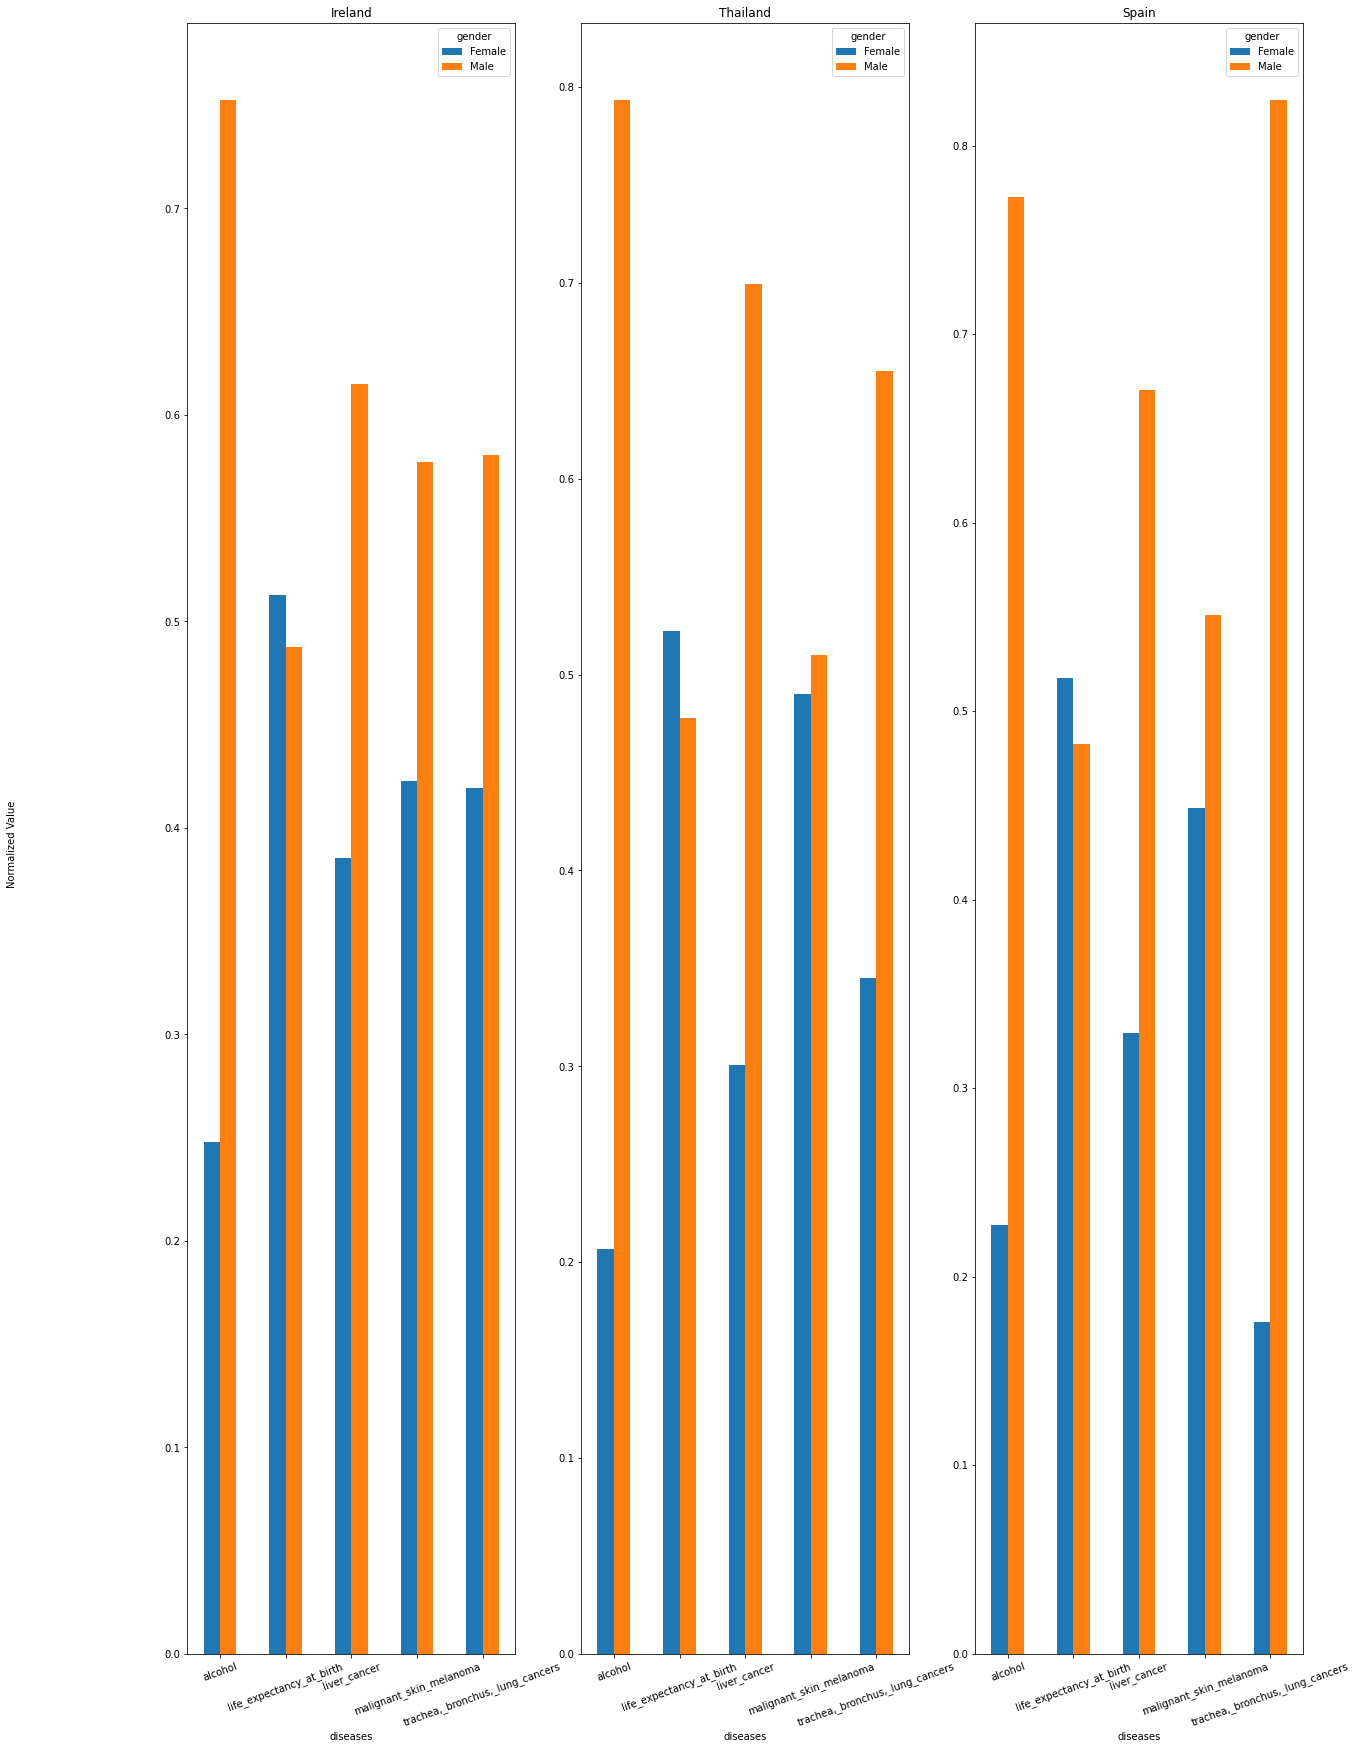

In [43]:
import matplotlib.pyplot as plt

# Create a figure with two subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 30))

# Plot the normalized values for Ireland by gender and disease
Ireland_diseases.pivot_table(index="diseases", columns="gender", values="normed_value").plot(kind="bar", ax=axes[0], rot=20, title="Ireland")

# Plot the normalized values for Thailand by gender and disease
Thailand_diseases.pivot_table(index="diseases", columns="gender", values="normed_value").plot(kind="bar", ax=axes[1], rot=20, title="Thailand")

# Plot the normalized values for Spain by gender and disease
Spain_diseases.pivot_table(index="diseases", columns="gender", values="normed_value").plot(kind="bar", ax=axes[2], rot=20, title="Spain")

# Set common y-axis label for the subplots
fig.text(0, 0.5, "Normalized Value", va="center", rotation="vertical")

# Display the plot
plt.show()


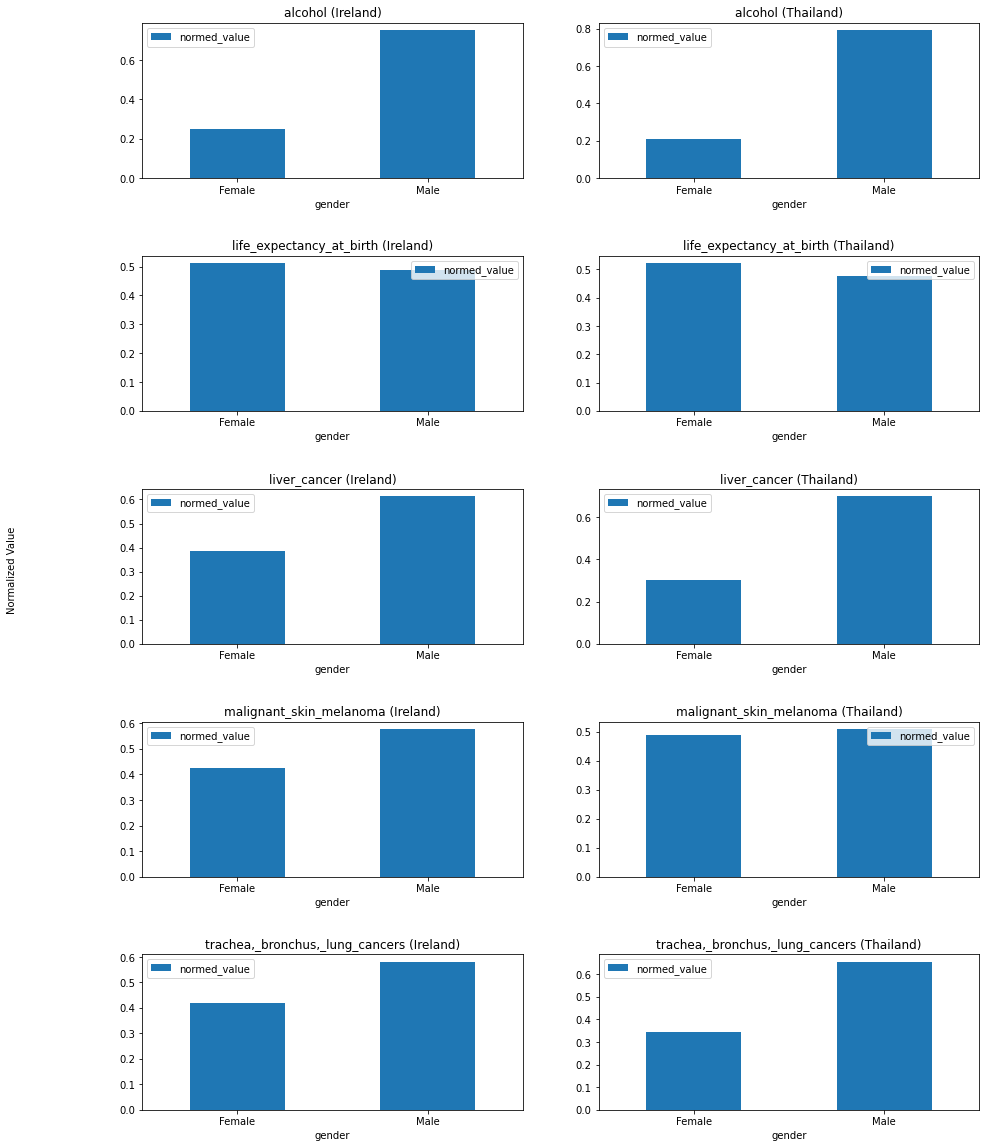

In [44]:
import matplotlib.pyplot as plt

# Create a figure with multiple subplots
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 20))

# Create a list of diseases to plot
diseases = ["alcohol", "life_expectancy_at_birth", "liver_cancer", "malignant_skin_melanoma", "trachea,_bronchus,_lung_cancers"]

# Plot the normalized values for Ireland by gender and disease
for i, disease in enumerate(diseases):
    Ireland_diseases.loc[Ireland_diseases["diseases"] == disease].pivot_table(index="gender", values="normed_value").plot(kind="bar", ax=axes[i, 0], rot=0, title=disease + " (Ireland)")

# Plot the normalized values for Thailand by gender and disease
for i, disease in enumerate(diseases):
    Thailand_diseases.loc[Thailand_diseases["diseases"] == disease].pivot_table(index="gender", values="normed_value").plot(kind="bar", ax=axes[i, 1], rot=0, title=disease + " (Thailand)")

# Set common y-axis label for all subplots
fig.text(0, 0.5, "Normalized Value", va="center", rotation="vertical")

# Adjust spacing between subplots
plt.subplots_adjust(hspace=0.5)

# Display the plot
plt.show()

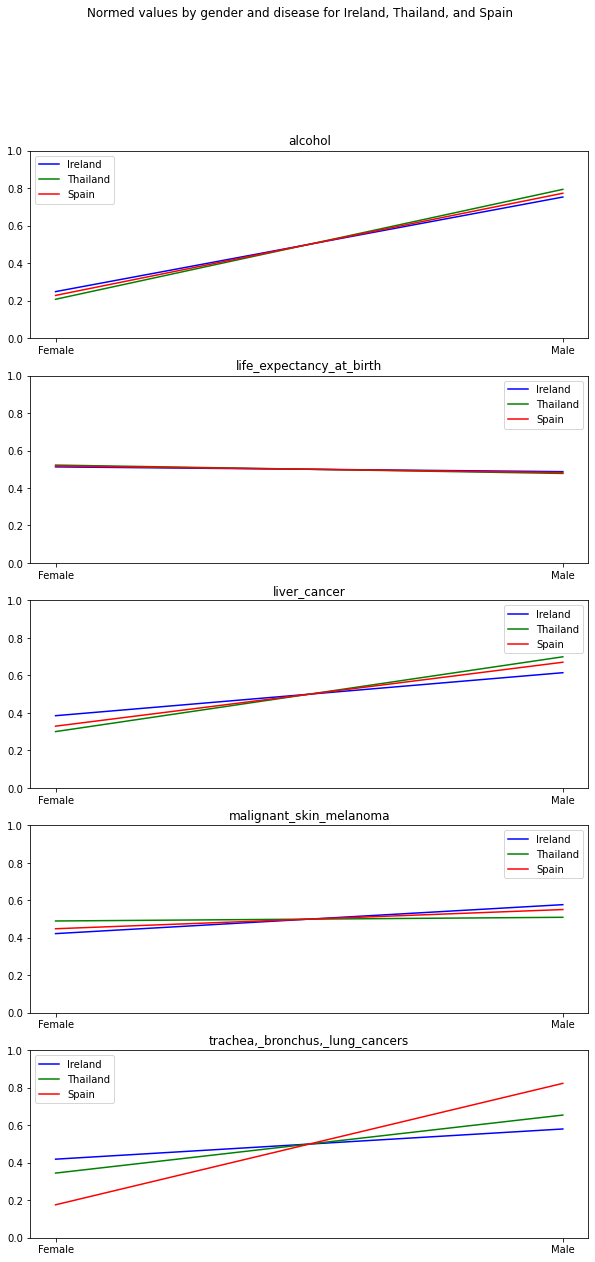

In [45]:
import matplotlib.pyplot as plt

# Create a list of the three data frames
dfs = [Ireland_diseases, Thailand_diseases, Spain_diseases]

# Create a list of the countries
countries = ["Ireland", "Thailand", "Spain"]

# Create a list of colors for each country
colors = ["blue", "green", "red"]

# Create a list of the diseases
diseases = ["alcohol", "life_expectancy_at_birth", "liver_cancer", "malignant_skin_melanoma", "trachea,_bronchus,_lung_cancers"]

# Create a figure with subplots for each disease
fig, axs = plt.subplots(nrows=len(diseases), ncols=1, figsize=(10,20))

# Loop through each disease
for i, disease in enumerate(diseases):
    
    # Create a list of the normed values for each country by gender
    normed_values = []
    for df in dfs:
        normed_values.append(df[df["diseases"]==disease][["gender", "normed_value"]])
    
    # Plot the normed values for each country by gender
    ax = axs[i]
    ax.set_title(disease)
    for j, normed_value in enumerate(normed_values):
        ax.plot(normed_value["gender"], normed_value["normed_value"], label=countries[j], color=colors[j])
        ax.set_ylim([0,1])
    
    # Add a legend to the subplot
    ax.legend()

# Add a title to the figure
fig.suptitle("Normed values by gender and disease for Ireland, Thailand, and Spain")

# Show the figure
plt.show()